#### This notebook contains all breakdowns of the school shooting data (1990-2013)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('CleanDatasets/school_shootings.csv')
data.head()

,Date,City,State,AreaType,School,Fatalities,Year
0,1990-05-20,Centerville,Tennessee,suburban,HS,1,1990
1,1990-08-26,Las Vegas,Nevada,urban,HS,1,1990
2,1991-01-08,Richardson,Texas,urban,HS,0,1991
3,1991-04-23,Compton,California,urban,MS,1,1991
4,1991-09-18,Crosby,Texas,rural,HS,1,1991


In [7]:
# creating a grouping of the count of school shootings by year (1990-2013)
year_group = data['Year']
year_group = year_group.value_counts().sort_index()
year_group = year_group.to_frame()
year_group.head()

,Year
1990,2
1991,7
1992,13
1993,35
1994,22


''

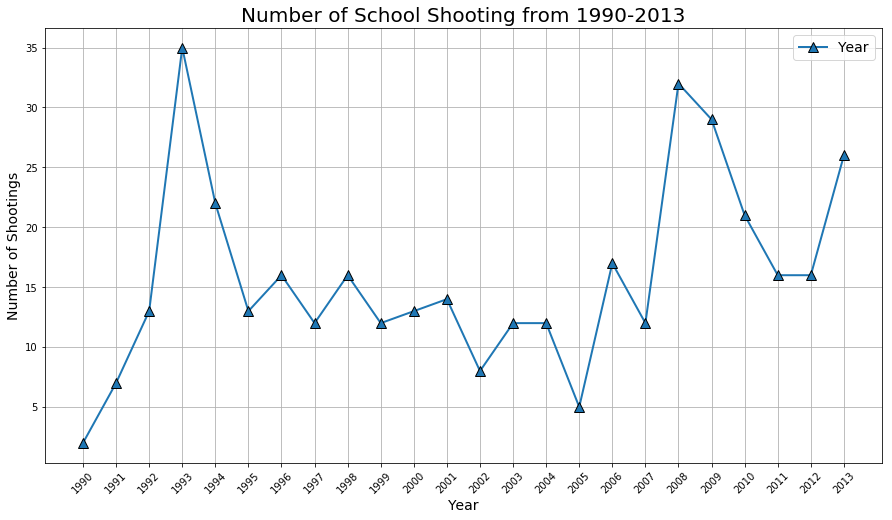

In [60]:
year_group.plot.line(figsize=(15,8), marker='^', markersize=10, markeredgecolor='black', linewidth=2)
plt.title('Number of School Shooting from 1990-2013', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Shootings', fontsize=14)
plt.xticks(year_group.index, rotation=45)
plt.grid()
plt.legend(fontsize=14)
plt.savefig('Figures/School_Shooting_Figures/shooting_per_year_line.png')
;

In [24]:
# creating a grouping of shooting by state (entire time period)
state_group = data[['Year','State']]
state_group = state_group.groupby('State').count()
state_group = state_group.rename(columns={'Year':'School Shootings'})
# state_group = state_group.reset_index()
state_group.head()

,School Shootings
State,
Alabama,10
Alaska,1
Arizona,6
Arkansas,6
California,56


In [31]:
state_group_top10 = state_group.sort_values('School Shootings', ascending=False).head(10)
state_group_top10

,School Shootings
State,
California,56
Texas,35
Florida,22
Pennsylvania,17
Tennessee,17
Michigan,16
Illinois,16
North Carolina,15
Washington,15


''

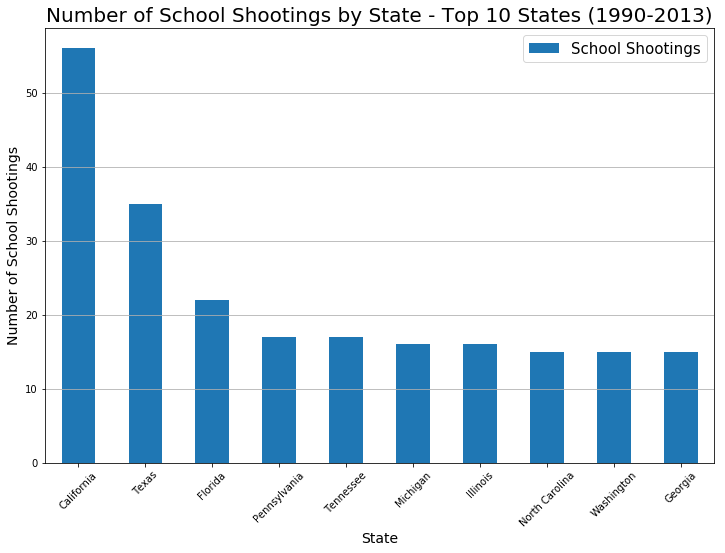

In [61]:
state_group_top10.plot.bar(figsize=(12,8))
plt.title('Number of School Shootings by State - Top 10 States (1990-2013)', fontsize=20)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of School Shootings', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.savefig('Figures/School_Shooting_Figures/top_10_states_bar.png')
;

In [35]:
# creating a grouping of shooting by state and year
state_year_group = data[['Year','State','School']]
state_year_group = state_year_group.groupby(['Year','State']).count()
state_year_group = state_year_group.rename(columns={'School':'School Shootings'})
# state_year_group = state_year_group.reset_index()
state_year_group.head()

School Shootings
Year State                       
1990 Nevada                     1
     Tennessee                  1
1991 California                 1
     Iowa                       1
     New York                   2

In [36]:
# creating a grouping of shootings by area type
area_group = data[['Year','AreaType']]
area_group = area_group.groupby(['AreaType']).count()
area_group = area_group.rename(columns={'Year':'School Shootings'})
# area_group = area_group.reset_index()
area_group

,School Shootings
AreaType,
rural,23
suburban,102
urban,256


''

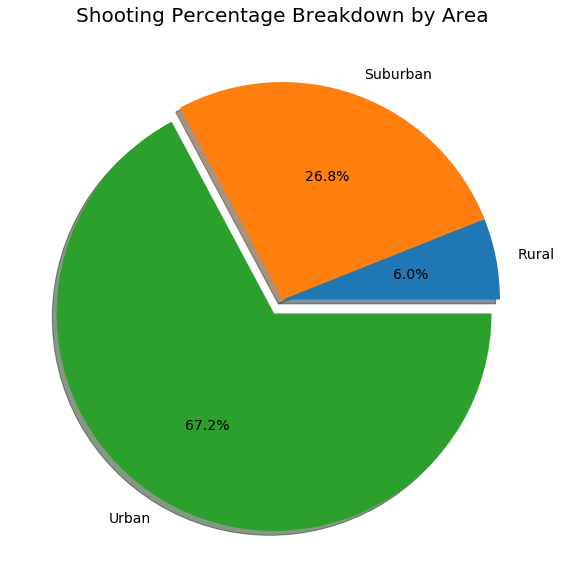

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(area_group['School Shootings'], labels=['Rural', 'Suburban', 'Urban'], autopct="%1.1f%%",
       explode=(0,0,0.075), shadow=True, textprops={'fontsize':14})
plt.title('Shooting Percentage Breakdown by Area', fontsize=20)
plt.savefig('Figures/School_Shooting_Figures/perc_area_pie.png')
;

In [17]:
# creating a grouping of shootings by area type and year
year_area_group = data[['Year','AreaType','School']]
year_area_group = year_area_group.groupby(['Year','AreaType']).count()
year_area_group = year_area_group.rename(columns={'School':'School Shootings'})
# year_area_group = year_area_group.reset_index()
year_area_group.head()

School Shootings
Year AreaType                  
1990 suburban                 1
     urban                    1
1991 rural                    1
     urban                    6
1992 suburban                 2

In [54]:
# creating a grouping of school type shooting
school_group = data[['School','State']]
school_group = school_group.groupby(['School']).count()
school_group = school_group.rename(columns={'State':'School Shootings'})
# school_group = school_group.reset_index()
school_group.head()

,School Shootings
School,
C,68
ES,35
HS,226
MS,51


''

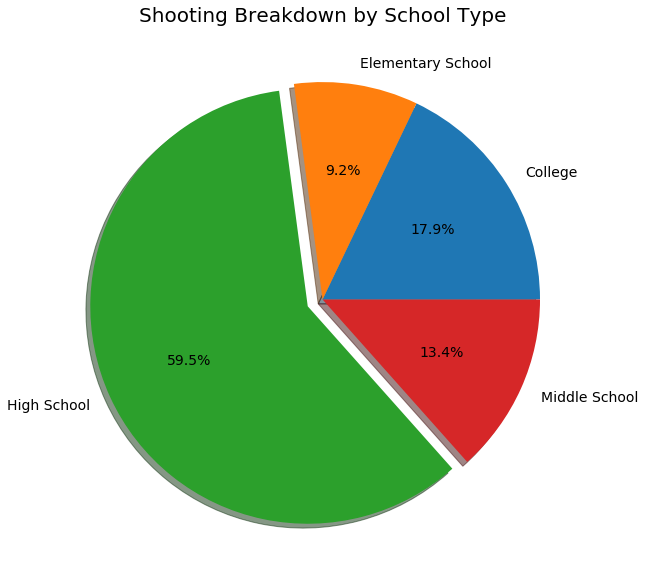

In [63]:
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.pie(school_group['School Shootings'], labels=['College', 'Elementary School', 'High School', 'Middle School'],
        autopct="%1.1f%%", shadow=True, textprops={'fontsize':14}, explode=(0,0,0.075,0))
plt.title('Shooting Breakdown by School Type', fontsize=20)
plt.savefig('Figures/School_Shooting_Figures/perc_schooltype_pie.png')
;

In [22]:
# creating a grouping of fatalities by year
fatalities_year = data[['Year','Fatalities']]
fatalities_year = fatalities_year.groupby('Year').sum()
fatalities_year.head()

,Fatalities
Year,
1990,2
1991,9
1992,13
1993,35
1994,22


In [23]:
# creating a grouping of fatalities by state
fatalities_state = data[['Fatalities','State']]
fatalities_state = fatalities_state.groupby(['State']).sum()
fatalities_state.head()

,Fatalities
State,
Alabama,10
Alaska,2
Arizona,7
Arkansas,11
California,57
